In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df=pd.read_csv("/content/drive/MyDrive/first inten project.csv")
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [7]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [8]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min  

In [9]:
# Count of unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].nunique() for col in categorical_cols}
print("\nUnique Values in Categorical Columns:")
print(unique_values)


Unique Values in Categorical Columns:
{'Booking_ID': 36285, 'type of meal': 4, 'room type': 7, 'market segment type': 5, 'date of reservation': 553, 'booking status': 2}


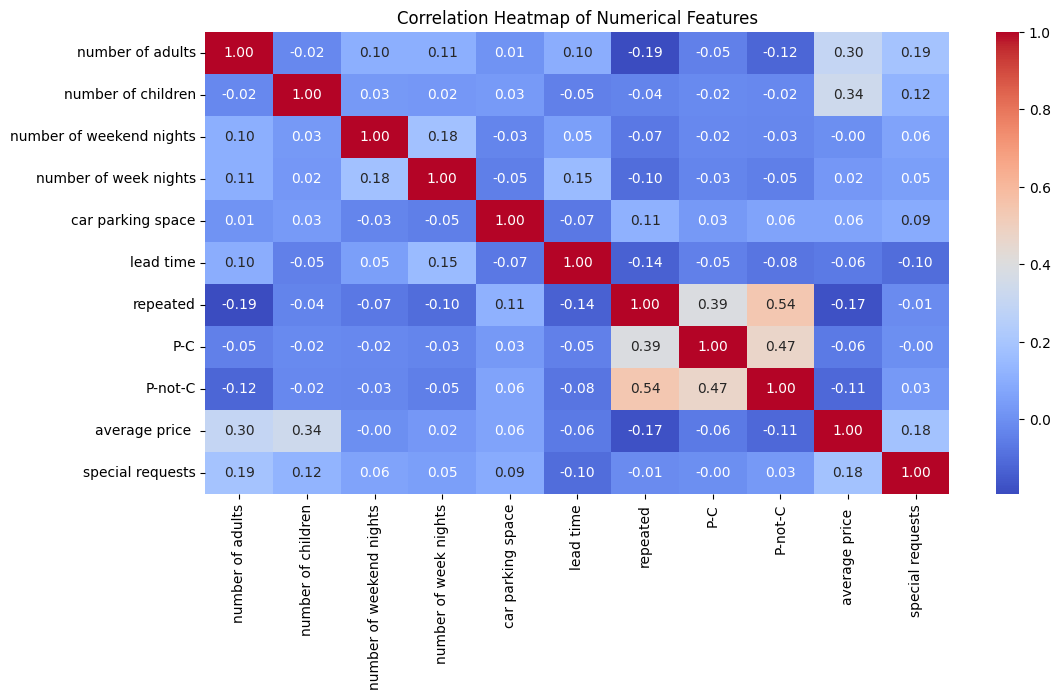

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<ipython-input-11-2590b6585af3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking status', data=df, palette='pastel')


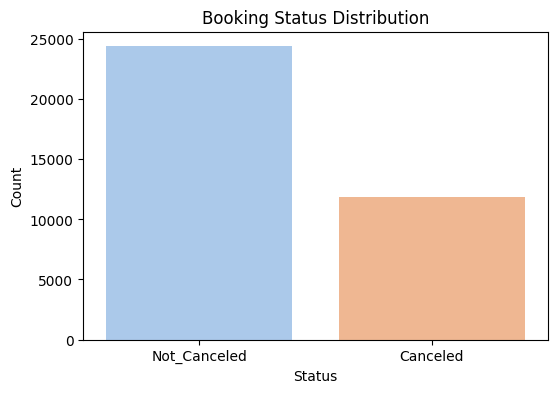

In [11]:
# Distribution of Booking Status
plt.figure(figsize=(6, 4))
sns.countplot(x='booking status', data=df, palette='pastel')
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

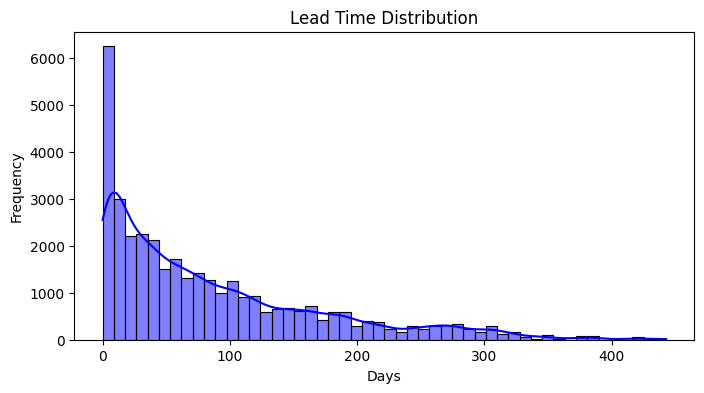

In [12]:
# Lead time distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['lead time'], bins=50, kde=True, color='blue')
plt.title("Lead Time Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [17]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')


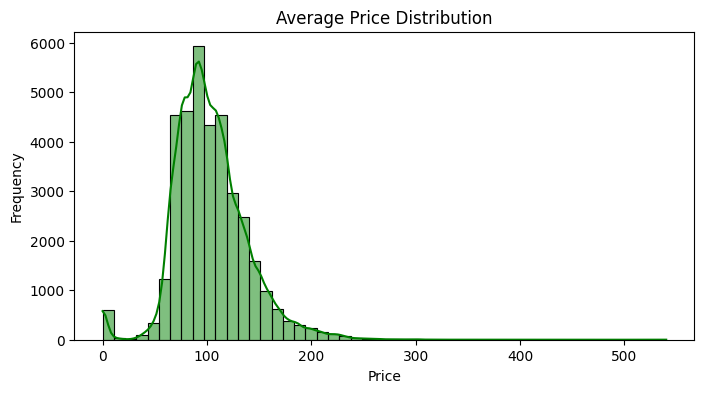

In [18]:
# Average price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['average price'], bins=50, kde=True, color='green')
plt.title("Average Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

<ipython-input-14-5b65adf779d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='lead time', data=df, palette='coolwarm')


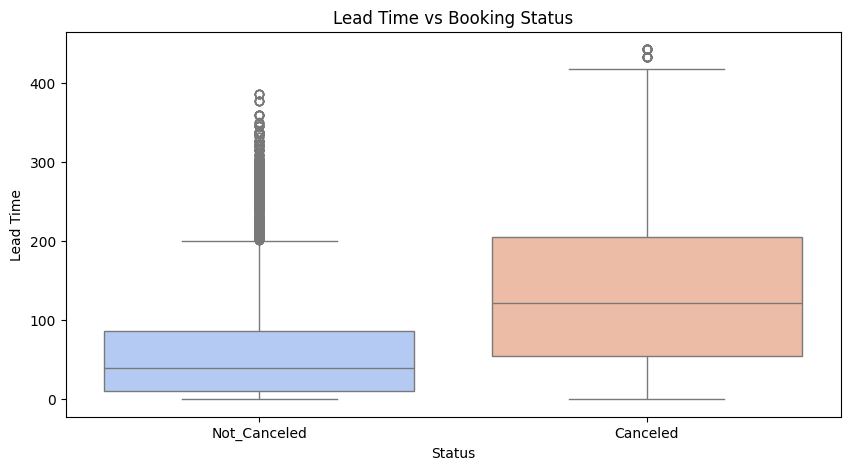

In [14]:
# Cancellations based on lead time
plt.figure(figsize=(10, 5))
sns.boxplot(x='booking status', y='lead time', data=df, palette='coolwarm')
plt.title("Lead Time vs Booking Status")
plt.xlabel("Status")
plt.ylabel("Lead Time")
plt.show()

<ipython-input-15-b62bd9457505>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='special requests', data=df, palette='muted')


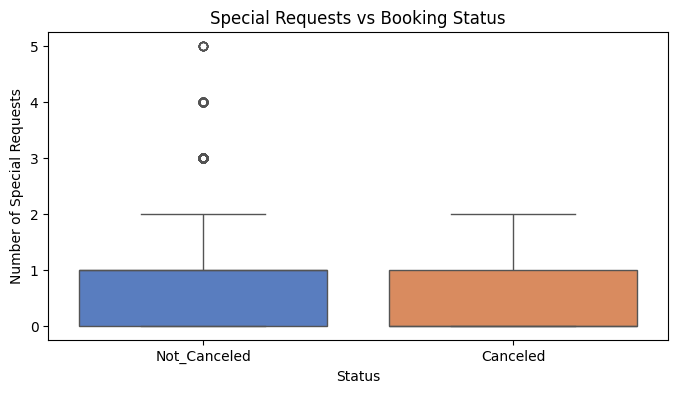

In [15]:
# Special requests vs booking status
plt.figure(figsize=(8, 4))
sns.boxplot(x='booking status', y='special requests', data=df, palette='muted')
plt.title("Special Requests vs Booking Status")
plt.xlabel("Status")
plt.ylabel("Number of Special Requests")
plt.show()